In [1]:
import numpy as np
import pandas as pd

In [2]:
columns  =[  "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

In [3]:
train = pd.read_csv(r"C:\Users\rasha\OneDrive\Desktop\Job 2026\ML PROJECTS\Adult Income Predictor\adult.data", encoding = "latin-1", header = None, names = columns)
test = pd.read_csv(r"C:\Users\rasha\OneDrive\Desktop\Job 2026\ML PROJECTS\Adult Income Predictor\adult.test", encoding = "latin-1", header = None, names = columns)

In [4]:
print('train set', train.shape)
print('test set', test.shape)

train set (32561, 15)
test set (16281, 15)


In [5]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Handle nulls

In [7]:
train.isnull().sum()  # no nulls detected

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
counter = 0
for i in columns:
   counter = counter + (train[i] == '?').astype(int)
   counter = counter + (train[i] == '').astype(int)

print(counter)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Length: 32561, dtype: int64


In [9]:
# handle Categorical columns

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
categorical = ['workclass', 'marital-status', 'occupation', 'relationship','race', 'sex', 'native-country']


In [13]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [14]:
train['income'] = train['income'].str.strip().str.replace('.', '', regex=False)

In [15]:
train['income'] = (train['income'] == '>50K').astype(int)

In [16]:
train['education-num'].value_counts()  # highly imbalaced dataset, most people belong to <=50k annual salary

education-num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [18]:
# presence / absence feature - capital- gain, loss
# check hours-per-week distribution
# drop fnlwgt, education
# capital - gain - 0 inlfated, oultier

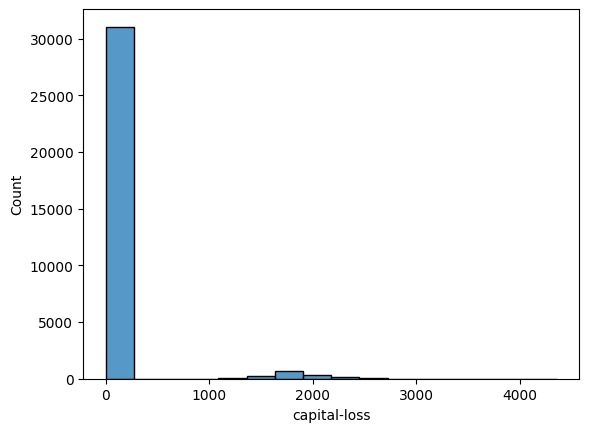

In [19]:
sns.histplot(train['capital-loss'])
plt.show()

<Axes: ylabel='capital-gain'>

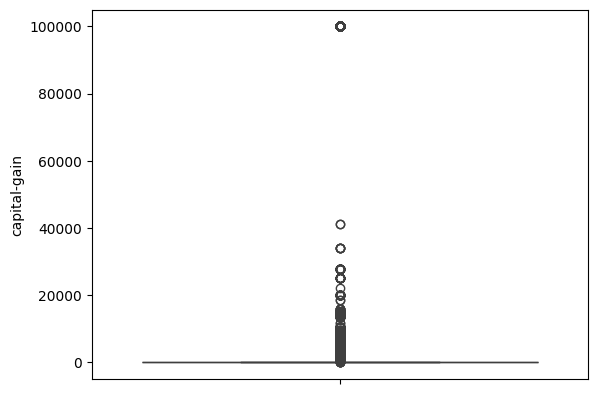

In [20]:
sns.boxplot(train['capital-gain'])

In [21]:
# there are ouliers in capital-loss / capital-gain , but they are legit outliers, keeoing them as it is

<Axes: xlabel='hours-per-week', ylabel='Count'>

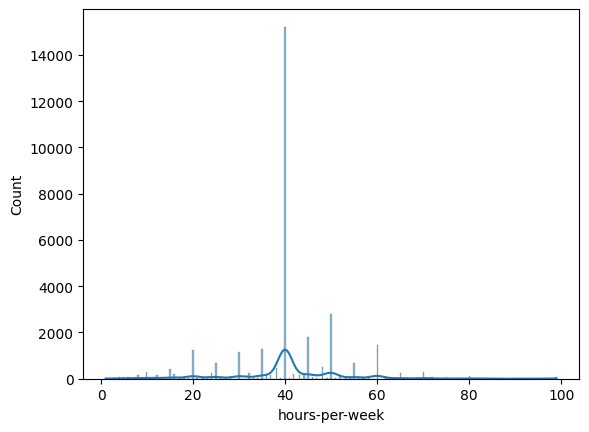

In [22]:
sns.histplot(train['hours-per-week'], kde  = True)

In [23]:
# encoding categorical columsn

categorical  = ['relationship', 'race', 'sex', 'marital-status', 'occupation', 'workclass', 'native-country']
numeric = ['hours-per-week', 'capital-gain', 'capital-loss', 'education-num']

# Native country - group rare into others and OHE


In [24]:
train['native-country'] = train['native-country'].replace('?', 'United-States')

In [25]:
X_df = train.drop('income', axis = 1)
y_df = train['income']

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

In [28]:
categorical = ['relationship', 'race', 'sex', 'marital-status',
               'occupation', 'workclass', 'native-country']
numeric = ['hours-per-week', 'capital-gain', 'capital-loss', 'education-num']

In [29]:
class AgeBinner(BaseEstimator, TransformerMixin):
    def __init__(self, bins=[0,25,35,50,65,100]):
        self.bins = bins

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['age_binned'] = pd.cut(X['age'], bins=self.bins, labels=False, include_lowest=True)
        return X.drop(columns=['age'])


class CountryGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=100):
        self.threshold = threshold
        self.common_countries = []

    def fit(self, X, y=None):
        counts = X['native-country'].value_counts()
        self.common_countries = counts[counts >= self.threshold].index.tolist()  # ensure list
        return self

    def transform(self, X):
        X = X.copy()
        # fallback: if somehow common_countries is empty, no error
        common = self.common_countries if self.common_countries else []
        X['native-country'] = X['native-country'].where(X['native-country'].isin(common), 'Other')
        return X


class CapitalPresence(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['Capital-loss-indicator'] = (X['capital-loss'] > 0).astype(int)
        X['Capital-gain-indicator'] = (X['capital-gain'] > 0).astype(int)
        return X

In [30]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('num', 'passthrough', numeric)
])

pipeline = Pipeline(steps=[
    ('capital_presence', CapitalPresence()),
    ('age_bin', AgeBinner()),
    ('country_group', CountryGrouper()),
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(eval_metric='logloss'))
])

In [32]:
from xgboost import XGBClassifier

In [33]:
param_dist = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth':[3,4,6,8],
    'model__learning_rate' :[0.01, 0.05, 0.1, 0.2],
    'model__subsample' : [0.7, 0.8, 1.0],
    'model__colsample_bytree':[0.7, 0.8, 1.0]
}

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 42)

In [36]:
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=25,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'model__colsample_bytree': [0.7, 0.8, ...], 'model__learning_rate': [0.01, 0.05, ...], 'model__max_depth': [3, 4, ...], 'model__n_estimators': [100, 200, ...], ...}"
,n_iter,25
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [37]:
from sklearn.metrics import accuracy_score
y_pred = search.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Best Params:", search.best_params_)

Accuracy: 0.8713342545677875
Best Params: {'model__subsample': 0.8, 'model__n_estimators': 100, 'model__max_depth': 6, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.7}


learning

Order that always works in sklearn pipelines

Must always respect this logic:

✔ Step 1 — Raw column modifications

(add new columns, drop columns, bin, group countries)

✔ Step 2 — Handle special cases

(capital presence, binning, grouping)

✔ Step 3 — Encode categorical columns

(OneHotEncoder, OrdinalEncoder)

✔ Step 4 — Model

(XGB, RF, LR…)

In [ ]:
import joblib
joblib.dump(search, "model.pkl")

['model.pkl']